In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
learning_rate = 0.01 # 학습률 0.01
training_epoch = 20  # 횟수 20
batch_size = 100     # 배치 사이즈 100
n_hidden = 256       # 은닉층의 개수 256
n_input = 28 * 28    # 784개(입력층)

In [0]:
# 인코더 만들기
X = tf.placeholder(tf.float32, [None, n_input])      # 비지도학습은 Y가 없다.

## W, b
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden])) # 입력층 노드, 은닉층 노드
b_encode = tf.Variable(tf.random_normal([n_hidden]))

## X*W + B
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [0]:
# 디코더 만들기
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
# encode * W + b
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [0]:
cost = tf.reduce_mean(tf.pow(X-decoder,2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [0]:
# 학습하기

In [8]:
print(mnist.train.num_examples)
print(int(mnist.train.num_examples/batch_size))

55000
550


In [9]:
batch_xs, batch_ys = mnist.train.next_batch(batch_size)
print(batch_xs.shape)
print(batch_ys.shape)


(100, 784)
(100, 10)


In [10]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)   # 변수 초기화 

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
  total_cost = 0
  
  for i in range(total_batch):   # 550번 cost구하고 가중치 수정하고
    batch_xs, batch_ys = mnist.train.next_batch(batch_size) # batch_xs:입력, batch_ys:출력
    _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs})
    total_cost += cost_val
    
  print("Epoch : {}, Avg cost :{}".format(epoch + 1, total_cost/total_batch))
print('최적화 완료')

Epoch : 1, Avg cost :0.18906763672828675
Epoch : 2, Avg cost :0.05863990454511209
Epoch : 3, Avg cost :0.04806380487301133
Epoch : 4, Avg cost :0.043483278439803555
Epoch : 5, Avg cost :0.0405195781046694
Epoch : 6, Avg cost :0.03847404924306003
Epoch : 7, Avg cost :0.03719862186773257
Epoch : 8, Avg cost :0.036015450541268694
Epoch : 9, Avg cost :0.035314272046089175
Epoch : 10, Avg cost :0.03476785984228958
Epoch : 11, Avg cost :0.0343146813897924
Epoch : 12, Avg cost :0.03314709317277778
Epoch : 13, Avg cost :0.03242446358230981
Epoch : 14, Avg cost :0.03198914965106683
Epoch : 15, Avg cost :0.031404456997459584
Epoch : 16, Avg cost :0.030540620166469704
Epoch : 17, Avg cost :0.030102520703592085
Epoch : 18, Avg cost :0.02991660968146541
Epoch : 19, Avg cost :0.029729654189537873
Epoch : 20, Avg cost :0.029521621066060932
최적화 완료


In [0]:
sample_size = 10
samples = sess.run(decoder,
 feed_dict = {X:mnist.test.images[:sample_size]})

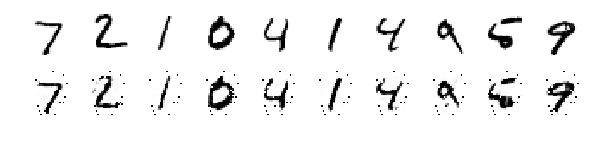

In [13]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))
for i in range(sample_size):
 ax[0][i].set_axis_off()
 ax[1][i].set_axis_off()
 ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
 ax[1][i].imshow(np.reshape(samples[i], (28,28)))

plt.show()
